In [1]:
from urllib import request
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import decomposition
from sklearn import preprocessing
sns.set()
# Python program to read 
# json file 
 
import json 

# Données textes

### Données insatisfations du DATASET

In [2]:
#  Données  DataAvisInsatisfaction
DataAvisInsatisfaction = pd.read_csv('P6_01_0_DataAvisInsatisfaction.csv', sep = ',', low_memory=False )
print('forme des données DataAvisInsatisfaction: ', DataAvisInsatisfaction.shape)
DataAvisInsatisfaction.head(10)

forme des données DataAvisInsatisfaction:  (411, 17)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,attributes,categories,hours,review_id,text,stars_y
0,I24pVfCFcQXBU6cbw3cTbA,Marvellous Edibles,120 Laird Dr,East York,ON,M4G 3V3,43.706903,-79.362240,3.5,4,0,"{'GoodForKids': 'True', 'BusinessParking': ""{'...",Restaurants,NaN,LVgwBW4Bt3NTM84MVXpnsA,I decided to try Marvellous Edibles because of...,1
1,0v7DIprUj2KASqg5PwqhUg,Burrell Inn,2734 Leechburg Rd,New Kensington,PA,15068,40.590214,-79.735945,3.5,9,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",Restaurants,NaN,MqKL9ELC4iHVgXxOwmrUOA,Came back into town after I moved out of state...,2
2,0v7DIprUj2KASqg5PwqhUg,Burrell Inn,2734 Leechburg Rd,New Kensington,PA,15068,40.590214,-79.735945,3.5,9,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",Restaurants,NaN,GUpDFgYfcXjuq_xxijWE4g,Stopped in to order a White pizza after shoppi...,1
3,0v7DIprUj2KASqg5PwqhUg,Burrell Inn,2734 Leechburg Rd,New Kensington,PA,15068,40.590214,-79.735945,3.5,9,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",Restaurants,NaN,TrkTEStdJPBVB2usbcFUww,This is a great place for drinks and bar food ...,2
4,IotFqwZTgTpFxO1ZtiZE-A,Restaurant Amir,2921 Boul De La Concorde E,Laval,QC,H7E 2B5,45.591893,-73.670158,3.5,3,1,NaN,Restaurants,NaN,FoHHT8TZ8TcFrARtOeCO7g,Bad customer service and rude employees. Unfri...,1
5,mxsgQr4mugtFCsu8ZqzFLA,Luchita's In Mentor,8870 Mentor Ave,Mentor,OH,44060,41.673859,-81.322821,2.5,3,1,"{'RestaurantsGoodForGroups': 'False', 'Busines...",Restaurants,NaN,ttMstECJXDJwrmmUJuL8XA,"Where do I start, with the fact that this Mexi...",1
6,G3tC4w70WyJ3Mk8udzENLQ,Restaurant Chez Dan,263 Boul Saint-Luc,Saint-Jean-sur-Richelieu,QC,J2W 1C4,45.354274,-73.294999,3.0,4,1,NaN,Restaurants,NaN,WnTC1cvgLHPTD5jfFVGm8g,Absolument inadmissible qu il n'y ait pas la p...,1
7,sfWFdhpwsThk4w9nDg1tTA,Best Steak & Gyros House,13620 Euclid Ave,Cleveland,OH,44112,41.524203,-81.587703,3.0,4,1,"{'RestaurantsReservations': 'False', 'Alcohol'...",Restaurants,NaN,xZuprDBAL3cKXwQmJBeLxw,Consider this place a mid flight refueling sta...,2
8,k9S4debJ-KEV7-b6pEOcpA,Food On the Move,14034 Saint Clair Ave,Cleveland,OH,44110,41.549924,-81.583998,1.5,3,1,NaN,Restaurants,NaN,p0Ccm0zMf0chH8irZ_HEWg,I waited a hour and 30 min. They game my food ...,2
9,k9S4debJ-KEV7-b6pEOcpA,Food On the Move,14034 Saint Clair Ave,Cleveland,OH,44110,41.549924,-81.583998,1.5,3,1,NaN,Restaurants,NaN,4W05fkm-ak9jIAT5fd9WhA,This was my go to spot but tonight I got cold ...,2


In [3]:
DataAvisInsatisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   411 non-null    object 
 1   name          411 non-null    object 
 2   address       401 non-null    object 
 3   city          411 non-null    object 
 4   state         411 non-null    object 
 5   postal_code   408 non-null    object 
 6   latitude      411 non-null    float64
 7   longitude     411 non-null    float64
 8   stars_x       411 non-null    float64
 9   review_count  411 non-null    int64  
 10  is_open       411 non-null    int64  
 11  attributes    365 non-null    object 
 12  categories    411 non-null    object 
 13  hours         46 non-null     object 
 14  review_id     411 non-null    object 
 15  text          411 non-null    object 
 16  stars_y       411 non-null    int64  
dtypes: float64(3), int64(3), object(11)
memory usage: 54.7+ KB


In [4]:
DataAvisInsatisfaction = DataAvisInsatisfaction.drop(["business_id","name","address","city","state","postal_code","latitude","longitude","stars_x","review_count","is_open","attributes","categories","hours","review_id"], axis=1)
DataAvisInsatisfaction = DataAvisInsatisfaction.rename(columns={"stars_y": "rating"})
DataAvisInsatisfaction

,text,rating
0,I decided to try Marvellous Edibles because of...,1
1,Came back into town after I moved out of state...,2
2,Stopped in to order a White pizza after shoppi...,1
3,This is a great place for drinks and bar food ...,2
4,Bad customer service and rude employees. Unfri...,1
...,...,...
406,My friends and I went to Sandey's Broaster Chi...,1
407,"The soup wasn't bad, but the guy who was servi...",2
408,Ate here 2 times for breakfast. Not sure why...,1
409,I came into Ollies this morning and ordered a ...,1


### Sélection des 200 restaurants  avec avis d'insatisfaction avec API YELP

In [5]:
#  Données  DataAvisInsatisfaction
DataAvisInsatisfactionAPI = pd.read_csv('P6_01_2_DataAvisInsatisfaction.csv', sep = ',', low_memory=False )
print('forme des données DataAvisInsatisfaction API: ', DataAvisInsatisfactionAPI.shape)
DataAvisInsatisfactionAPI.head(10)

forme des données DataAvisInsatisfaction API:  (674, 2)


,text,rating
0,Wanna snuggle up to someone while sharing an i...,5
1,Went here on a whim and it was a wise choice! ...,5
2,Stumbled upon Freddy's on our first night in P...,5
3,La Poule au Pot made our last night in Paris r...,5
4,Our experience was excellent. The food was ter...,4
5,"Noooooo, no no. Was really excited to try this...",1
6,Stopped by for a very late dinner a few evenin...,4
7,*Caveat- this is a review from an American tou...,2
8,Le Bonaparte is fine. Nothing incredible. Food...,3
9,MUMI is seriously such an awesome place! And i...,5


In [6]:
DataAvisInsatisfactionAPI = DataAvisInsatisfactionAPI[DataAvisInsatisfactionAPI.rating < 3]
DataAvisInsatisfactionAPI

,text,rating
5,"Noooooo, no no. Was really excited to try this...",1
7,*Caveat- this is a review from an American tou...,2
22,This place succeeded in one thing with flying ...,1
40,"What a let down! Stuffy, old fashioned, past i...",2
41,"Here's what is great about Tour d""Argent. The ...",2
...,...,...
641,After buying a €10 cocktail and waiting 40 min...,1
649,"Ordered regional menu with salad, sea bass and...",2
650,Stare into the windows of Le Grand Cafe des Né...,1
651,OMG! This place should be shut down before the...,1


In [7]:
DataAvisInsatisfactionAPI.to_csv('P6_01_2_3_DataAvisInsatisfactionAPI.csv', index = False)

### Concaténation de DataAvisInsatisfaction du DATASET avec DataAvisInsatisfactionAPI de l'API YELP

In [8]:
DataAvisInsatisfaction = pd.concat([DataAvisInsatisfaction, DataAvisInsatisfactionAPI])
DataAvisInsatisfaction

,text,rating
0,I decided to try Marvellous Edibles because of...,1
1,Came back into town after I moved out of state...,2
2,Stopped in to order a White pizza after shoppi...,1
3,This is a great place for drinks and bar food ...,2
4,Bad customer service and rude employees. Unfri...,1
...,...,...
641,After buying a €10 cocktail and waiting 40 min...,1
649,"Ordered regional menu with salad, sea bass and...",2
650,Stare into the windows of Le Grand Cafe des Né...,1
651,OMG! This place should be shut down before the...,1


In [9]:
DataAvisInsatisfaction.to_csv('P6_01_2_3_DataAvisInsatisfaction.csv', index = False)

In [10]:
#  Données  DataAvisInsatisfaction
DataAvisInsatisfaction = pd.read_csv('P6_01_2_3_DataAvisInsatisfaction.csv', sep = ',', low_memory=False )
print('forme des données DataAvisInsatisfaction : ', DataAvisInsatisfaction.shape)
DataAvisInsatisfaction.head(10)

forme des données DataAvisInsatisfaction :  (527, 2)


,text,rating
0,I decided to try Marvellous Edibles because of...,1
1,Came back into town after I moved out of state...,2
2,Stopped in to order a White pizza after shoppi...,1
3,This is a great place for drinks and bar food ...,2
4,Bad customer service and rude employees. Unfri...,1
5,"Where do I start, with the fact that this Mexi...",1
6,Absolument inadmissible qu il n'y ait pas la p...,1
7,Consider this place a mid flight refueling sta...,2
8,I waited a hour and 30 min. They game my food ...,2
9,This was my go to spot but tonight I got cold ...,2


In [11]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re 
stemming = PorterStemmer()
Lemmatizer = WordNetLemmatizer()
stops = set(stopwords.words("english"))
stops2 = set(stopwords.words("french"))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jcrro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jcrro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jcrro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
txt = DataAvisInsatisfaction.text.values.astype(str)
txt = str(txt)
txt

'[\'I decided to try Marvellous Edibles because of the rave review the first reviewer gave it, and because it is in my neighborhood of Leaside. I\\\'ve always driven past it and wondered what it was like, but since she gave it such a great review, I thought I\\\'d give it a go. \\n\\nThe restaurant has a sort of Parisian cafe feel to it, with mismatched chairs and some booths and tables, and a mural on the wall. Upon arrival mid-Saturday afternoon, we were also presented with 3 menus, breakfast (which was ending shortly), sandwiches and another menu which appeared to be dinner options, priced $16 - $24 range. My friend and I both selected from the sandwich menu. \\n\\nI ordered the BLT, but having noticed that they served peameal bacon for breakfast, asked if I could have peameal on my BLT, they obliged, no problem. My friend ordered the meat loaf sandwich and we both ordered the sweet potato fries. \\n\\nService was fast, there were only 2 other occupied tables in the restaurant. I wa

In [13]:
def clean_punctuation(raw_text):
    """This function works on a raw text string, and:
        1) removes punctuation and non-word text
        2) rejoins words"""
    
 
    token_words = [w for w in raw_text if w.isalpha()]
 
    
    # Rejoin meaningful stemmed words
    joined_words = ( " ".join(token_words))
    
    # Return cleaned data
    return joined_words

In [14]:
clean_txt = clean_punctuation(txt) #removes punctuation, see above
clean_txt

'I d e c i d e d t o t r y M a r v e l l o u s E d i b l e s b e c a u s e o f t h e r a v e r e v i e w t h e f i r s t r e v i e w e r g a v e i t a n d b e c a u s e i t i s i n m y n e i g h b o r h o o d o f L e a s i d e I v e a l w a y s d r i v e n p a s t i t a n d w o n d e r e d w h a t i t w a s l i k e b u t s i n c e s h e g a v e i t s u c h a g r e a t r e v i e w I t h o u g h t I d g i v e i t a g o n n T h e r e s t a u r a n t h a s a s o r t o f P a r i s i a n c a f e f e e l t o i t w i t h m i s m a t c h e d c h a i r s a n d s o m e b o o t h s a n d t a b l e s a n d a m u r a l o n t h e w a l l U p o n a r r i v a l m i d S a t u r d a y a f t e r n o o n w e w e r e a l s o p r e s e n t e d w i t h m e n u s b r e a k f a s t w h i c h w a s e n d i n g s h o r t l y s a n d w i c h e s a n d a n o t h e r m e n u w h i c h a p p e a r e d t o b e d i n n e r o p t i o n s p r i c e d r a n g e M y f r i e n d a n d I b o t h s e l e c t e d f r o m t h e

In [15]:
def clean_text(raw_text):
    """This function works on a raw text string, and:
        1) changes to lower case
        2) tokenizes (breaks down into words
        3) removes punctuation and non-word text
        4) finds word stems
        5) removes stop words
        6) rejoins meaningful stem words"""
    
    # Convert to lower case
    text = raw_text.lower()
    
    # Tokenize
    tokens = nltk.word_tokenize(text)
    
    # Keep only words (removes punctuation + numbers)
    # use .isalnum to keep also numbers
    token_words = [w for w in tokens if w.isalpha()]
    
    # Stemming
    #stemmed_words = [stemming.stem(w) for w in token_words]
    
    # Remove stop words
    meaningful_words = [w for w in token_words if not w in stops]
    
    # Remove stop words
    meaningful_words2 = [w for w in meaningful_words if not w in stops]    

    # Rejoin meaningful stemmed words
    joined_words = ( " ".join(meaningful_words2))
    
    # Return cleaned data
    return joined_words

In [16]:
clean_txt = clean_text(txt) #removes punctuation, see above
clean_txt

'decided try marvellous edibles rave review first reviewer gave neighborhood leaside always driven past wondered like since gave great review thought give go restaurant sort parisian cafe feel mismatched chairs booths tables mural wall upon arrival afternoon also presented menus breakfast ending shortly sandwiches another menu appeared dinner options priced range friend selected sandwich menu ordered blt noticed served peameal bacon breakfast asked could peameal blt obliged problem friend ordered meat loaf sandwich ordered sweet potato fries fast occupied tables restaurant expecting average sandwich really figure screw blt er thought wrong peameal overcooked dry served bread egg challah bread found disappointed whole sandwich dry asked mayo waiter said already mayo opened thing bare showed said umm actually awkward meatloaf sandwich mess first asked onions allergic upon receiving sandwich proceed pick somewhere range pieces red onion sandwich problem sandwich complete mess regular bun 

In [17]:
def clean_texte(raw_text):
    """This function works on a raw text string, and:
        1) changes to lower case
        2) tokenizes (breaks down into words
        3) removes punctuation and non-word text
        4) finds word stems
        5) finds word lems
        6) removes stop words
        7) rejoins meaningful stem words"""
    
    # Convert to lower case
    text = raw_text.lower()
    
    # Tokenize
    tokens = nltk.word_tokenize(text)
    
    # Keep only words (removes punctuation + numbers)
    # use .isalnum to keep also numbers
    token_words = [w for w in tokens if w.isalpha()]
    
    # Stemming
    stemmed_words = [stemming.stem(w) for w in token_words]

    # lemmatizer    
    lemmatizer_words = [Lemmatizer.lemmatize(w) for w in stemmed_words]
    
    # Remove stop words
    meaningful_words = [w for w in lemmatizer_words if not w in stops]
    
     # Remove stop words
    meaningful_words2 = [w for w in meaningful_words if not w in stops2]   
    
    # Rejoin meaningful stemmed words
    joined_words = ( " ".join(meaningful_words2))
    
    # Return cleaned data
    return joined_words

### Texte nettoyé : la ponctuation et les mots de liaison ont été retirés, les chaînes de caractères ont été mises en minuscule et trois transformations “stemming”, “tokenization”, “lemmatization” 

In [18]:
"""This function works on a raw text string, and:
        1) changes to lower case
        2) tokenizes (breaks down into words
        3) removes punctuation and non-word text
        4) finds word stems
        5) finds word lems
        6) removes stop words
        7) rejoins meaningful stem words"""
clean_txt2 = clean_texte(txt)
clean_txt2

'decid tri marvel edibl becaus rave review first review gave becaus neighborhood leasid alway driven past wonder wa like sinc gave great review thought give go restaur ha sort parisian cafe feel mismatch chair booth tabl mural wall upon arriv afternoon also present menu breakfast wa end shortli sandwich anoth menu appear dinner option price rang friend select sandwich menu order blt notic serv peameal bacon breakfast ask could peameal blt oblig problem friend order meat loaf sandwich order sweet potato fri wa fast onli occupi tabl restaur wa expect averag sandwich realli figur screw blt er thought wrong peameal wa overcook veri dri wa serv bread egg challah bread found wa disappoint whole sandwich wa dri ask mayo waiter said wa alreadi mayo open thing wa bare show said umm actual awkward meatloaf sandwich wa mess first ask onion wa allerg upon receiv sandwich proceed pick somewher rang piec red onion sandwich problem sandwich wa wa complet mess wa regular bun gravi wa meatloaf half bun

In [19]:
def apply_cleaning_function_to_list(X):
    cleaned_X = []
    for element in X:
        cleaned_X.append(clean_texte(element))
    return cleaned_X

In [20]:
# Get text to clean
text_to_clean = list(DataAvisInsatisfaction['text'])

# Clean text
cleaned_text = apply_cleaning_function_to_list(text_to_clean)

# Add cleaned data back into DataFrame
DataAvisInsatisfaction['cleaned_review'] = cleaned_text

# Remove temporary cleaned_text list (after transfer to DataFrame)
#del cleaned_text
cleaned_text

['decid tri marvel edibl becaus rave review first review gave becaus neighborhood leasid alway driven past wonder wa like sinc gave great review thought give go restaur ha sort parisian cafe feel mismatch chair booth tabl mural wall upon arriv afternoon also present menu breakfast wa end shortli sandwich anoth menu appear dinner option price rang friend select sandwich menu order blt notic serv peameal bacon breakfast ask could peameal blt oblig problem friend order meat loaf sandwich order sweet potato fri servic wa fast onli occupi tabl restaur wa expect averag sandwich realli figur screw blt er thought wrong peameal wa overcook veri dri wa serv bread egg challah bread found wa disappoint whole sandwich wa dri ask mayo waiter said wa alreadi mayo open thing wa bare show said umm actual awkward friend meatloaf sandwich wa mess first ask onion wa allerg upon receiv sandwich proceed pick somewher rang piec red onion sandwich problem sandwich wa wa complet mess wa regular bun gravi wa me

In [21]:
DataAvisInsatisfaction

,text,rating,cleaned_review
0,I decided to try Marvellous Edibles because of...,1,decid tri marvel edibl becaus rave review firs...
1,Came back into town after I moved out of state...,2,came back town move state year order normal ch...
2,Stopped in to order a White pizza after shoppi...,1,stop order white pizza shop order ahead first ...
3,This is a great place for drinks and bar food ...,2,thi great place drink bar food mind stench cig...
4,Bad customer service and rude employees. Unfri...,1,bad custom servic rude employe unfriendli atmo...
...,...,...,...
522,After buying a €10 cocktail and waiting 40 min...,1,buy cocktail wait minut per person share safe ...
523,"Ordered regional menu with salad, sea bass and...",2,order region menu salad sea bass dessert flavo...
524,Stare into the windows of Le Grand Cafe des Né...,1,stare window grand cafe négociant see number p...
525,OMG! This place should be shut down before the...,1,omg thi place shut befor poison someon salmone...


In [22]:
DataAvisInsatisfaction.to_csv('P6_01_2_3_DataAvisInsatisfactionCLEANED REVIEW.csv', index = False)

# Utilisation de LDA avec BOW

In [23]:
import logging
import time
from contextlib import contextmanager
import os
from multiprocessing import Process
import psutil

import numpy as np
import pandas as pd
from numpy.random import RandomState
from sklearn import decomposition
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import fetch_olivetti_faces
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score

import gensim.downloader
from gensim import matutils, utils
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel, LdaModel, TfidfModel
from gensim.models.basemodel import BaseTopicModel
from gensim.models.nmf import Nmf as GensimNmf
from gensim.parsing.preprocessing import preprocess_string

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [24]:
from gensim import corpora, models
from pprint import pprint

In [25]:
import pandas as pd;
import numpy as np;
import scipy as sp;
import sklearn;
import sys;
from nltk.corpus import stopwords;
import nltk;
from gensim.models import ldamodel
import gensim.corpora;
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;
import pickle;

In [26]:
# We only need the Headlines text column from the data
data_text = DataAvisInsatisfaction[['cleaned_review']];

In [27]:
data_text = data_text.astype('str');
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['cleaned_review'] = [word for word in data_text.iloc[idx]['cleaned_review'].split(' ') if word not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)));
#save data because it takes very long to remove stop words
pickle.dump(data_text, open('data_text.dat', 'wb'))
#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

c = 0 / 527

In [28]:
num_topics = 5

In [29]:
dictionary = Dictionary(train_headlines)
bowcorpus = [dictionary.doc2bow(text) for text in train_headlines]

2021-03-15 14:33:10,517 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-03-15 14:33:10,548 : INFO : built Dictionary(3833 unique tokens: ['actual', 'afternoon', 'allerg', 'alloc', 'alreadi']...) from 527 documents (total 24466 corpus positions)


In [30]:
LdaModelbow = LdaModel(corpus=bowcorpus, id2word=dictionary, iterations=50, num_topics=num_topics)

2021-03-15 14:33:10,578 : INFO : using symmetric alpha at 0.2
2021-03-15 14:33:10,579 : INFO : using symmetric eta at 0.2
2021-03-15 14:33:10,581 : INFO : using serial LDA version on this node
2021-03-15 14:33:10,583 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 527 documents, updating model once every 527 documents, evaluating perplexity every 527 documents, iterating 50x with a convergence threshold of 0.001000
2021-03-15 14:33:10,583 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-03-15 14:33:10,990 : INFO : -9.365 per-word bound, 659.3 perplexity estimate based on a held-out corpus of 527 documents with 24466 words
2021-03-15 14:33:10,990 : INFO : PROGRESS: pass 0, at document #527/527
2021-03-15 14:33:11,349 : INFO : topic #0 (0.200): 0.040*"wa" + 0.013*"food" + 0.010*"place" + 0.008*"order" + 0.007*"get" + 0.007*"like" + 0.007*"realli" + 0

In [31]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [32]:
df_lda_bow_cleaned_review = get_lda_topics(LdaModelbow, num_topics)
df_lda_bow_cleaned_review

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,wa,wa,wa,wa,wa
1,food,food,food,food,place
2,place,place,order,order,food
3,order,go,good,place,order
4,get,order,chicken,like,go
5,like,good,like,time,get
6,realli,like,time,servic,good
7,go,time,place,would,like
8,good,restaur,got,fri,would
9,eat,get,sandwich,wait,time


In [33]:
LdaModelbow.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=True)

[(0,
  '0.040*"wa" + 0.013*"food" + 0.010*"place" + 0.008*"order" + 0.007*"get" + 0.007*"like" + 0.007*"realli" + 0.007*"go" + 0.006*"good" + 0.006*"eat"'),
 (1,
  '0.044*"wa" + 0.012*"food" + 0.010*"place" + 0.009*"go" + 0.008*"order" + 0.007*"good" + 0.007*"like" + 0.006*"time" + 0.006*"restaur" + 0.006*"get"'),
 (2,
  '0.023*"wa" + 0.010*"food" + 0.008*"order" + 0.007*"good" + 0.007*"chicken" + 0.007*"like" + 0.005*"time" + 0.005*"place" + 0.004*"got" + 0.004*"sandwich"'),
 (3,
  '0.040*"wa" + 0.015*"food" + 0.014*"order" + 0.009*"place" + 0.008*"like" + 0.008*"time" + 0.007*"servic" + 0.007*"would" + 0.006*"fri" + 0.006*"wait"'),
 (4,
  '0.037*"wa" + 0.019*"place" + 0.015*"food" + 0.009*"order" + 0.008*"go" + 0.008*"get" + 0.007*"good" + 0.007*"like" + 0.007*"would" + 0.007*"time"')]

In [34]:
print('Cohérence du modèle avec u_mass')
CoherenceModel(
    model=LdaModelbow,
    corpus=bowcorpus,
    coherence='u_mass'
).get_coherence()

Cohérence du modèle avec u_mass


-1.4739340411601185

In [35]:
print('Cohérence du modèle avec c_v')
CoherenceModel(
    model=LdaModelbow,
    corpus=bowcorpus,
    texts=train_headlines,
    coherence='c_v'
).get_coherence()

2021-03-15 14:33:11,468 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


Cohérence du modèle avec c_v


2021-03-15 14:33:21,754 : INFO : 7 accumulators retrieved from output queue
2021-03-15 14:33:21,769 : INFO : accumulated word occurrence stats for 3453 virtual documents


0.2815395580006392

# Utilisation de NMF avec BOW

In [36]:
nmfbow = GensimNmf(corpus=bowcorpus, id2word=dictionary, num_topics=num_topics)

2021-03-15 14:33:21,972 : INFO : running NMF training, 5 topics, 1 passes over the supplied corpus of 527 documents, evaluating l2 norm every 527 documents
2021-03-15 14:33:21,979 : INFO : PROGRESS: pass 0, at document #527/527
2021-03-15 14:33:22,055 : INFO : L2 norm: 204.04546476285768
2021-03-15 14:33:22,073 : INFO : topic #0 (0.000): 0.001*"inspector" + 0.001*"farmer" + 0.001*"tristan" + 0.001*"control" + 0.001*"toss" + 0.001*"cigarett" + 0.001*"refus" + 0.001*"rude" + 0.001*"cart" + 0.001*"ummm"
2021-03-15 14:33:22,074 : INFO : topic #1 (0.000): 0.001*"assez" + 0.001*"atroci" + 0.001*"layout" + 0.001*"drink" + 0.001*"attendez" + 0.001*"consider" + 0.001*"touch" + 0.001*"hope" + 0.001*"wad" + 0.001*"histori"
2021-03-15 14:33:22,075 : INFO : topic #2 (0.000): 0.001*"tasteless" + 0.001*"ketchup" + 0.001*"grace" + 0.001*"step" + 0.001*"sorta" + 0.001*"cajun" + 0.001*"effici" + 0.001*"important" + 0.001*"truckstop" + 0.001*"cart"
2021-03-15 14:33:22,076 : INFO : topic #3 (0.000): 0.001

In [37]:
def get_nmf_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [38]:
df_mnf_bow_cleaned_review = get_nmf_topics(nmfbow, num_topics)
df_mnf_bow_cleaned_review

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,place,place,wa,wa,wa
1,go,food,becaus,would,food
2,like,order,order,order,good
3,inspect,get,chees,like,servic
4,bar,drink,sandwich,chicken,veri
5,particip,like,restaur,back,go
6,routin,eat,time,sauc,even
7,get,wait,fri,veri,place
8,servic,said,ask,could,better
9,peopl,use,get,good,two


In [39]:
nmfbow.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=True)

[(0,
  '0.025*"place" + 0.015*"go" + 0.011*"like" + 0.008*"inspect" + 0.007*"bar" + 0.007*"particip" + 0.007*"routin" + 0.006*"get" + 0.006*"servic" + 0.006*"peopl"'),
 (1,
  '0.024*"place" + 0.023*"food" + 0.016*"order" + 0.013*"get" + 0.012*"drink" + 0.012*"like" + 0.011*"eat" + 0.010*"wait" + 0.009*"said" + 0.008*"use"'),
 (2,
  '0.016*"wa" + 0.014*"becaus" + 0.014*"order" + 0.013*"chees" + 0.013*"sandwich" + 0.013*"restaur" + 0.013*"time" + 0.008*"fri" + 0.008*"ask" + 0.008*"get"'),
 (3,
  '0.105*"wa" + 0.014*"would" + 0.012*"order" + 0.011*"like" + 0.010*"chicken" + 0.010*"back" + 0.008*"sauc" + 0.007*"veri" + 0.007*"could" + 0.007*"good"'),
 (4,
  '0.045*"wa" + 0.019*"food" + 0.017*"good" + 0.012*"servic" + 0.010*"veri" + 0.010*"go" + 0.008*"even" + 0.007*"place" + 0.007*"better" + 0.007*"two"')]

In [40]:
print('Cohérence du modèle avec u_mass')
CoherenceModel(
    model=nmfbow,
    corpus=bowcorpus,
    coherence='u_mass'
).get_coherence()

Cohérence du modèle avec u_mass


-2.6825206259276984

In [41]:
print('Cohérence du modèle avec c_v')
CoherenceModel(
    model=nmfbow,
    corpus=bowcorpus,
    texts=train_headlines,
    coherence='c_v'
).get_coherence()

2021-03-15 14:33:22,223 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


Cohérence du modèle avec c_v


2021-03-15 14:33:32,636 : INFO : 7 accumulators retrieved from output queue
2021-03-15 14:33:32,653 : INFO : accumulated word occurrence stats for 3455 virtual documents


0.34879185680344116

# Utilisation de LSI avec BOW

In [42]:
from gensim.models import LsiModel

lsi_modelbow = LsiModel(corpus=bowcorpus , num_topics=num_topics, id2word=dictionary)
topics = lsi_modelbow.print_topics(num_words=10)
for topic in topics:
    print(topic)

2021-03-15 14:33:32,847 : INFO : using serial LSI version on this node
2021-03-15 14:33:32,848 : INFO : updating model with new documents
2021-03-15 14:33:32,848 : INFO : preparing a new chunk of documents
2021-03-15 14:33:32,854 : INFO : using 100 extra samples and 2 power iterations
2021-03-15 14:33:32,855 : INFO : 1st phase: constructing (3833, 105) action matrix
2021-03-15 14:33:32,860 : INFO : orthonormalizing (3833, 105) action matrix
2021-03-15 14:33:32,904 : INFO : 2nd phase: running dense svd on (105, 527) matrix
2021-03-15 14:33:32,915 : INFO : computing the final decomposition
2021-03-15 14:33:32,916 : INFO : keeping 5 factors (discarding 58.415% of energy spectrum)
2021-03-15 14:33:32,918 : INFO : processed documents up to #527
2021-03-15 14:33:32,919 : INFO : topic #0(100.073): -0.772*"wa" + -0.181*"food" + -0.178*"order" + -0.157*"place" + -0.120*"like" + -0.109*"would" + -0.104*"good" + -0.102*"restaur" + -0.095*"get" + -0.095*"go"
2021-03-15 14:33:32,920 : INFO : topic 

(0, '-0.772*"wa" + -0.181*"food" + -0.178*"order" + -0.157*"place" + -0.120*"like" + -0.109*"would" + -0.104*"good" + -0.102*"restaur" + -0.095*"get" + -0.095*"go"')
(1, '-0.523*"wa" + 0.356*"place" + 0.337*"food" + 0.187*"order" + 0.168*"time" + 0.168*"like" + 0.155*"go" + 0.155*"get" + 0.110*"drink" + 0.103*"good"')
(2, '0.547*"order" + -0.438*"place" + -0.177*"like" + 0.143*"food" + -0.123*"make" + -0.114*"sandwich" + -0.113*"look" + 0.110*"fri" + -0.103*"good" + -0.100*"cuban"')
(3, '-0.334*"chees" + -0.266*"sandwich" + -0.204*"becaus" + -0.189*"like" + 0.186*"drink" + -0.184*"fri" + 0.184*"food" + -0.181*"restaur" + 0.170*"place" + 0.152*"wait"')
(4, '-0.456*"food" + 0.363*"like" + 0.222*"get" + 0.175*"could" + 0.138*"salad" + 0.122*"look" + -0.122*"restaur" + -0.114*"pork" + -0.113*"good" + -0.108*"place"')


In [43]:
def get_lsi_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [44]:
df_lsi_bow_cleaned_review = get_lsi_topics(lsi_modelbow, num_topics)
df_lsi_bow_cleaned_review

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,wa,wa,order,chees,food
1,food,place,place,sandwich,like
2,order,food,like,becaus,get
3,place,order,food,like,could
4,like,time,make,drink,salad
5,would,like,sandwich,fri,look
6,good,go,look,food,restaur
7,restaur,get,fri,restaur,pork
8,get,drink,good,place,good
9,go,good,cuban,wait,place


In [45]:
lsi_modelbow.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=True)

[(0,
  '-0.772*"wa" + -0.181*"food" + -0.178*"order" + -0.157*"place" + -0.120*"like" + -0.109*"would" + -0.104*"good" + -0.102*"restaur" + -0.095*"get" + -0.095*"go"'),
 (1,
  '-0.523*"wa" + 0.356*"place" + 0.337*"food" + 0.187*"order" + 0.168*"time" + 0.168*"like" + 0.155*"go" + 0.155*"get" + 0.110*"drink" + 0.103*"good"'),
 (2,
  '0.547*"order" + -0.438*"place" + -0.177*"like" + 0.143*"food" + -0.123*"make" + -0.114*"sandwich" + -0.113*"look" + 0.110*"fri" + -0.103*"good" + -0.100*"cuban"'),
 (3,
  '-0.334*"chees" + -0.266*"sandwich" + -0.204*"becaus" + -0.189*"like" + 0.186*"drink" + -0.184*"fri" + 0.184*"food" + -0.181*"restaur" + 0.170*"place" + 0.152*"wait"'),
 (4,
  '-0.456*"food" + 0.363*"like" + 0.222*"get" + 0.175*"could" + 0.138*"salad" + 0.122*"look" + -0.122*"restaur" + -0.114*"pork" + -0.113*"good" + -0.108*"place"')]

In [46]:
print('Cohérence du modèle avec u_mass')
CoherenceModel(
    model=lsi_modelbow,
    corpus=bowcorpus,
    coherence='u_mass'
).get_coherence()

Cohérence du modèle avec u_mass


-3.0619764879502744

In [47]:
print('Cohérence du modèle avec c_v')
CoherenceModel(
    model=lsi_modelbow,
    corpus=bowcorpus,
    texts=train_headlines,
    coherence='c_v'
).get_coherence()

2021-03-15 14:33:33,038 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


Cohérence du modèle avec c_v


2021-03-15 14:33:43,394 : INFO : 7 accumulators retrieved from output queue
2021-03-15 14:33:43,413 : INFO : accumulated word occurrence stats for 3447 virtual documents


0.43840366321679874

# Utilisation de LDA avec tfidf

In [48]:
tfidf = models.TfidfModel(bowcorpus)
corpus_tfidf = tfidf[bowcorpus]

2021-03-15 14:33:43,636 : INFO : collecting document frequencies
2021-03-15 14:33:43,637 : INFO : PROGRESS: processing document #0
2021-03-15 14:33:43,644 : INFO : calculating IDF weights for 527 documents and 3833 features (19734 matrix non-zeros)


In [49]:
LdaModeltfidf = LdaModel(corpus=corpus_tfidf, id2word=dictionary, iterations=50, num_topics=num_topics)

2021-03-15 14:33:43,666 : INFO : using symmetric alpha at 0.2
2021-03-15 14:33:43,667 : INFO : using symmetric eta at 0.2
2021-03-15 14:33:43,668 : INFO : using serial LDA version on this node
2021-03-15 14:33:43,672 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 527 documents, updating model once every 527 documents, evaluating perplexity every 527 documents, iterating 50x with a convergence threshold of 0.001000
2021-03-15 14:33:43,672 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-03-15 14:33:44,050 : INFO : -14.174 per-word bound, 18480.3 perplexity estimate based on a held-out corpus of 527 documents with 2645 words
2021-03-15 14:33:44,051 : INFO : PROGRESS: pass 0, at document #527/527
2021-03-15 14:33:44,278 : INFO : topic #0 (0.200): 0.003*"wa" + 0.003*"place" + 0.002*"order" + 0.002*"get" + 0.002*"servic" + 0.002*"time" + 0.002*"go" + 0

In [50]:
def get_ldatfidf_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [51]:
df_lda_tfidf_cleaned_review = get_ldatfidf_topics(LdaModeltfidf, num_topics)
df_lda_tfidf_cleaned_review

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,wa,wa,wa,wa,wa
1,place,good,food,food,wait
2,order,food,place,servic,drink
3,get,place,sandwich,close,order
4,servic,realli,like,restaur,time
5,time,order,restaur,good,server
6,go,look,servic,order,restaur
7,like,like,salad,veri,food
8,veri,chicken,veri,place,eat
9,food,time,go,chicken,place


In [52]:
LdaModeltfidf.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=True)

[(0,
  '0.003*"wa" + 0.003*"place" + 0.002*"order" + 0.002*"get" + 0.002*"servic" + 0.002*"time" + 0.002*"go" + 0.002*"like" + 0.002*"veri" + 0.002*"food"'),
 (1,
  '0.002*"wa" + 0.002*"good" + 0.002*"food" + 0.002*"place" + 0.002*"realli" + 0.002*"order" + 0.001*"look" + 0.001*"like" + 0.001*"chicken" + 0.001*"time"'),
 (2,
  '0.002*"wa" + 0.002*"food" + 0.002*"place" + 0.002*"sandwich" + 0.002*"like" + 0.002*"restaur" + 0.002*"servic" + 0.002*"salad" + 0.002*"veri" + 0.002*"go"'),
 (3,
  '0.003*"wa" + 0.002*"food" + 0.002*"servic" + 0.002*"close" + 0.002*"restaur" + 0.002*"good" + 0.002*"order" + 0.002*"veri" + 0.002*"place" + 0.002*"chicken"'),
 (4,
  '0.003*"wa" + 0.002*"wait" + 0.002*"drink" + 0.002*"order" + 0.002*"time" + 0.002*"server" + 0.002*"restaur" + 0.002*"food" + 0.002*"eat" + 0.002*"place"')]

In [53]:
print('Cohérence du modèle avec u_mass')
CoherenceModel(
    model=LdaModeltfidf,
    corpus=corpus_tfidf,
    coherence='u_mass'
).get_coherence()

Cohérence du modèle avec u_mass


-1.6125382193781683

In [54]:
print('Cohérence du modèle avec c_v')
CoherenceModel(
    model=LdaModeltfidf,
    corpus=corpus_tfidf,
    texts=train_headlines,
    coherence='c_v'
).get_coherence()

2021-03-15 14:33:44,448 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


Cohérence du modèle avec c_v


2021-03-15 14:33:54,894 : INFO : 7 accumulators retrieved from output queue
2021-03-15 14:33:54,908 : INFO : accumulated word occurrence stats for 3457 virtual documents


0.2673491750668897

# Utilisation de NMF avec tfidf

In [55]:
nmftfidf = GensimNmf(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics)

2021-03-15 14:33:55,071 : INFO : running NMF training, 5 topics, 1 passes over the supplied corpus of 527 documents, evaluating l2 norm every 527 documents
2021-03-15 14:33:55,158 : INFO : PROGRESS: pass 0, at document #527/527
2021-03-15 14:33:55,232 : INFO : L2 norm: 22.87042209145477
2021-03-15 14:33:55,251 : INFO : topic #0 (0.000): 0.001*"midnight" + 0.001*"stair" + 0.001*"manger" + 0.001*"heavenli" + 0.001*"blacken" + 0.001*"morel" + 0.001*"classifi" + 0.001*"sweatshirt" + 0.001*"scruffi" + 0.001*"meali"
2021-03-15 14:33:55,252 : INFO : topic #1 (0.000): 0.001*"pearson" + 0.001*"nyc" + 0.001*"moistur" + 0.001*"instanc" + 0.001*"predat" + 0.001*"hill" + 0.001*"smell" + 0.001*"truck" + 0.001*"overst" + 0.001*"foo"
2021-03-15 14:33:55,253 : INFO : topic #2 (0.000): 0.001*"licens" + 0.001*"tasteless" + 0.001*"horrend" + 0.001*"choic" + 0.001*"swiss" + 0.001*"notic" + 0.001*"understaf" + 0.001*"reus" + 0.001*"midwest" + 0.001*"lite"
2021-03-15 14:33:55,254 : INFO : topic #3 (0.000): 0

In [56]:
def get_nmftfidf_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [57]:
df_mnf_tfidf_cleaned_review = get_nmftfidf_topics(nmftfidf, num_topics)
df_mnf_tfidf_cleaned_review

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,chicken,wa,wa,wa,restaur
1,order,order,realli,serv,wa
2,fri,food,place,meat,ani
3,time,tabl,seat,steak,server
4,get,close,great,disappoint,like
5,salad,chicken,bit,lunch,bar
6,chees,wait,veri,year,onli
7,worst,restaur,go,star,becaus
8,sandwich,time,pizza,befor,say
9,like,worth,good,chees,servic


In [58]:
nmftfidf.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=True)

[(0,
  '0.008*"chicken" + 0.007*"order" + 0.007*"fri" + 0.005*"time" + 0.005*"get" + 0.004*"salad" + 0.004*"chees" + 0.004*"worst" + 0.004*"sandwich" + 0.004*"like"'),
 (1,
  '0.006*"wa" + 0.005*"order" + 0.005*"food" + 0.005*"tabl" + 0.005*"close" + 0.004*"chicken" + 0.004*"wait" + 0.004*"restaur" + 0.004*"time" + 0.004*"worth"'),
 (2,
  '0.008*"wa" + 0.006*"realli" + 0.005*"place" + 0.005*"seat" + 0.005*"great" + 0.004*"bit" + 0.004*"veri" + 0.004*"go" + 0.004*"pizza" + 0.004*"good"'),
 (3,
  '0.006*"wa" + 0.005*"serv" + 0.005*"meat" + 0.004*"steak" + 0.004*"disappoint" + 0.004*"lunch" + 0.004*"year" + 0.004*"star" + 0.004*"befor" + 0.004*"chees"'),
 (4,
  '0.005*"restaur" + 0.005*"wa" + 0.004*"ani" + 0.004*"server" + 0.004*"like" + 0.004*"bar" + 0.004*"onli" + 0.004*"becaus" + 0.004*"say" + 0.004*"servic"')]

In [59]:
print('Cohérence du modèle avec u_mass')
CoherenceModel(
    model=nmftfidf,
    corpus=corpus_tfidf,
    coherence='u_mass'
).get_coherence()

Cohérence du modèle avec u_mass


-2.600963210301102

In [60]:
print('Cohérence du modèle avec c_v')
CoherenceModel(
    model=nmftfidf,
    corpus=corpus_tfidf,
    texts=train_headlines,
    coherence='c_v'
).get_coherence()

2021-03-15 14:33:55,526 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


Cohérence du modèle avec c_v


2021-03-15 14:34:05,954 : INFO : 7 accumulators retrieved from output queue
2021-03-15 14:34:05,974 : INFO : accumulated word occurrence stats for 3459 virtual documents


0.25629500043487974

# Utilisation de LSI avec tfidf

In [61]:
from gensim.models import LsiModel

lsi_modeltfidf = LsiModel(corpus=corpus_tfidf , num_topics=num_topics, id2word=dictionary)
topics = lsi_modeltfidf.print_topics(num_words=10)
for topic in topics:
    print(topic)

2021-03-15 14:34:06,170 : INFO : using serial LSI version on this node
2021-03-15 14:34:06,171 : INFO : updating model with new documents
2021-03-15 14:34:06,263 : INFO : preparing a new chunk of documents
2021-03-15 14:34:06,268 : INFO : using 100 extra samples and 2 power iterations
2021-03-15 14:34:06,269 : INFO : 1st phase: constructing (3833, 105) action matrix
2021-03-15 14:34:06,273 : INFO : orthonormalizing (3833, 105) action matrix
2021-03-15 14:34:06,320 : INFO : 2nd phase: running dense svd on (105, 527) matrix
2021-03-15 14:34:06,329 : INFO : computing the final decomposition
2021-03-15 14:34:06,329 : INFO : keeping 5 factors (discarding 85.709% of energy spectrum)
2021-03-15 14:34:06,331 : INFO : processed documents up to #527
2021-03-15 14:34:06,332 : INFO : topic #0(3.813): -0.213*"wa" + -0.155*"order" + -0.135*"food" + -0.133*"place" + -0.119*"time" + -0.118*"get" + -0.114*"good" + -0.114*"like" + -0.110*"would" + -0.108*"go"
2021-03-15 14:34:06,333 : INFO : topic #1(1.

(0, '-0.213*"wa" + -0.155*"order" + -0.135*"food" + -0.133*"place" + -0.119*"time" + -0.118*"get" + -0.114*"good" + -0.114*"like" + -0.110*"would" + -0.108*"go"')
(1, '0.279*"chicken" + -0.188*"wait" + -0.186*"close" + 0.175*"sauc" + 0.140*"fri" + -0.133*"bar" + -0.124*"reserv" + 0.123*"sandwich" + 0.123*"meat" + -0.113*"busi"')
(2, '-0.397*"close" + 0.216*"wait" + -0.180*"open" + 0.174*"servic" + -0.165*"sign" + -0.163*"review" + 0.158*"worst" + 0.140*"ever" + -0.121*"say" + -0.116*"star"')
(3, '-0.231*"close" + 0.193*"bar" + 0.166*"pischk" + -0.161*"chicken" + -0.154*"fri" + 0.149*"realli" + -0.148*"ever" + 0.139*"drink" + -0.131*"worst" + 0.123*"good"')
(4, '0.219*"bad" + 0.179*"worst" + 0.176*"realli" + -0.173*"order" + 0.170*"aw" + -0.164*"busi" + 0.155*"ever" + -0.136*"sandwich" + 0.134*"restaur" + -0.129*"wait"')


In [62]:
def get_lsitfidf_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [63]:
df_lsi_tfidf_cleaned_review = get_lsitfidf_topics(lsi_modeltfidf, num_topics)
df_lsi_tfidf_cleaned_review

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,wa,chicken,close,close,bad
1,order,wait,wait,bar,worst
2,food,close,open,pischk,realli
3,place,sauc,servic,chicken,order
4,time,fri,sign,fri,aw
5,get,bar,review,realli,busi
6,good,reserv,worst,ever,ever
7,like,sandwich,ever,drink,sandwich
8,would,meat,say,worst,restaur
9,go,busi,star,good,wait


In [64]:
lsi_modeltfidf.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=True)

[(0,
  '-0.213*"wa" + -0.155*"order" + -0.135*"food" + -0.133*"place" + -0.119*"time" + -0.118*"get" + -0.114*"good" + -0.114*"like" + -0.110*"would" + -0.108*"go"'),
 (1,
  '0.279*"chicken" + -0.188*"wait" + -0.186*"close" + 0.175*"sauc" + 0.140*"fri" + -0.133*"bar" + -0.124*"reserv" + 0.123*"sandwich" + 0.123*"meat" + -0.113*"busi"'),
 (2,
  '-0.397*"close" + 0.216*"wait" + -0.180*"open" + 0.174*"servic" + -0.165*"sign" + -0.163*"review" + 0.158*"worst" + 0.140*"ever" + -0.121*"say" + -0.116*"star"'),
 (3,
  '-0.231*"close" + 0.193*"bar" + 0.166*"pischk" + -0.161*"chicken" + -0.154*"fri" + 0.149*"realli" + -0.148*"ever" + 0.139*"drink" + -0.131*"worst" + 0.123*"good"'),
 (4,
  '0.219*"bad" + 0.179*"worst" + 0.176*"realli" + -0.173*"order" + 0.170*"aw" + -0.164*"busi" + 0.155*"ever" + -0.136*"sandwich" + 0.134*"restaur" + -0.129*"wait"')]

In [65]:
print('Cohérence du modèle avec u_mass')
CoherenceModel(
    model=lsi_modeltfidf,
    corpus=corpus_tfidf,
    coherence='u_mass'
).get_coherence()

Cohérence du modèle avec u_mass


-5.351378600157114

In [66]:
print('Cohérence du modèle avec c_v')
CoherenceModel(
    model=lsi_modeltfidf,
    corpus=corpus_tfidf,
    texts=train_headlines,
    coherence='c_v'
).get_coherence()

2021-03-15 14:34:06,592 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


Cohérence du modèle avec c_v


2021-03-15 14:34:16,950 : INFO : 7 accumulators retrieved from output queue
2021-03-15 14:34:16,970 : INFO : accumulated word occurrence stats for 3454 virtual documents


0.32204252445052695

# TSNE MODEL LDA

In [67]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

from gensim.models import LdaModel
from gensim import corpora
from sklearn.manifold import TSNE
# %matplotlib notebook # if in Jupyter for rotating and zooming

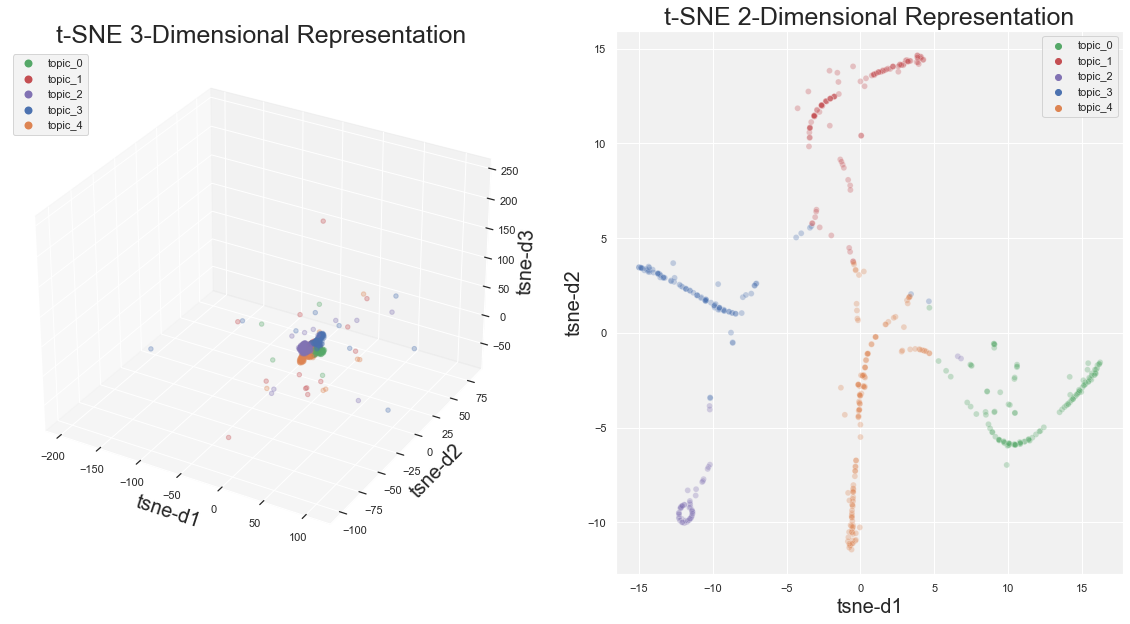

In [68]:

                               

    df_topic_coherences = pd.DataFrame(columns = ['topic_{}'.format(i) for i in range(num_topics)])

    for i in range(len(bowcorpus)):
        df_topic_coherences.loc[i] = [0] * num_topics
        
        output = LdaModelbow.__getitem__(bow=bowcorpus[i], eps=0)
        #output = dirichlet_model.__getitem__(bow=bow_corpus[i], eps=0)
    
        for j in range(len(output)):
            topic_num = output[j][0]
            coherence = output[j][1]
            df_topic_coherences.iloc[i, topic_num] = coherence

    for i in range(num_topics):
        df_topic_coherences.iloc[:, i] = df_topic_coherences.iloc[:, i].astype('float64', copy=False)

    df_topic_coherences['main_topic'] = df_topic_coherences.iloc[:, :num_topics].idxmax(axis=1)

    if num_topics > 10:
        # cubehelix better for more than 10 colors
        colors = sns.color_palette("cubehelix", num_topics)
    else:
        # The default sns color palette
        colors = sns.color_palette('deep', num_topics)
    dimension = 'both'
    tsne_2 = None
    tsne_3 = None
    if dimension == 'both':
        tsne_2 = TSNE(n_components=2, perplexity=40, n_iter=300)
        tsne_3 = TSNE(n_components=3, perplexity=40, n_iter=300)
    elif dimension == '2d':
        tsne_2 = TSNE(n_components=2, perplexity=40, n_iter=300)
    elif dimension == '3d':
        tsne_3 = TSNE(n_components=3, perplexity=40, n_iter=300)
    else:
        ValueError("An invalid value has been passed to the 'dimension' argument - choose from 2d, 3d, or both.")

    if tsne_2 is not None:
        tsne_results_2 = tsne_2.fit_transform(df_topic_coherences.iloc[:, :num_topics])
        
        df_tsne_2 = pd.DataFrame()
        df_tsne_2['tsne-2d-d1'] = tsne_results_2[:,0]
        df_tsne_2['tsne-2d-d2'] = tsne_results_2[:,1]
        df_tsne_2['main_topic'] = df_topic_coherences.iloc[:, num_topics]
        df_tsne_2['color'] = [colors[int(t.split('_')[1])] for t in df_tsne_2['main_topic']]

        df_tsne_2['topic_num'] = [int(i.split('_')[1]) for i in df_tsne_2['main_topic']]
        df_tsne_2 = df_tsne_2.sort_values(['topic_num'], ascending = True).drop('topic_num', axis=1)
    
    if tsne_3 is not None:
        colors = [c for c in sns.color_palette()]

        tsne_results_3 = tsne_3.fit_transform(df_topic_coherences.iloc[:, :num_topics])
        
        df_tsne_3 = pd.DataFrame()
        df_tsne_3['tsne-3d-d1'] = tsne_results_3[:,0]
        df_tsne_3['tsne-3d-d2'] = tsne_results_3[:,1]
        df_tsne_3['tsne-3d-d3'] = tsne_results_3[:,2]
        df_tsne_3['main_topic'] = df_topic_coherences.iloc[:, num_topics]
        df_tsne_3['color'] = [colors[int(t.split('_')[1])] for t in df_tsne_3['main_topic']]

        df_tsne_3['topic_num'] = [int(i.split('_')[1]) for i in df_tsne_3['main_topic']]
        df_tsne_3 = df_tsne_3.sort_values(['topic_num'], ascending = True).drop('topic_num', axis=1)
        remove_3d_outliers = False
        if remove_3d_outliers:
            # Remove those rows with values that are more than three standard deviations from the column mean
            for col in ['tsne-3d-d1', 'tsne-3d-d2', 'tsne-3d-d3']:
                df_tsne_3 = df_tsne_3[np.abs(df_tsne_3[col] - df_tsne_3[col].mean()) <= (3 * df_tsne_3[col].std())]

    if tsne_2 is not None and tsne_3 is not None:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, # pylint: disable=unused-variable
                                       figsize=(20,10))
        ax1.axis('off')

    else:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

    if tsne_2 is not None and tsne_3 is not None:
        # Plot tsne_2, with tsne_3 being added later
        ax1 = sns.scatterplot(data=df_tsne_2, x="tsne-2d-d1", y="tsne-2d-d2",
                              hue=df_topic_coherences.iloc[:, num_topics], alpha=0.3)
        
        light_grey_tup = (242/256, 242/256, 242/256)
        ax1.set_facecolor(light_grey_tup)
        ax1.axes.set_title('t-SNE 2-Dimensional Representation', fontsize=25)
        ax1.set_xlabel('tsne-d1', fontsize=20)
        ax1.set_ylabel('tsne-d2', fontsize=20)

        handles, labels = ax1.get_legend_handles_labels()
        legend_order = list(np.argsort([i.split('_')[1] for i in labels]))
        ax1.legend([handles[i] for i in legend_order], [labels[i] for i in legend_order], 
                   facecolor=light_grey_tup)

    elif tsne_2 is not None:
        # Plot just tsne_2
        ax = sns.scatterplot(data=df_tsne_2, x="tsne-2d-d1", y="tsne-2d-d2",
                             hue=df_topic_coherences.iloc[:, num_topics], alpha=0.3)

        ax.set_facecolor(light_grey_tup)
        ax.axes.set_title('t-SNE 2-Dimensional Representation', fontsize=25)
        ax.set_xlabel('tsne-d1', fontsize=20)
        ax.set_ylabel('tsne-d2', fontsize=20)

        handles, labels = ax.get_legend_handles_labels()
        legend_order = list(np.argsort([i.split('_')[1] for i in labels]))
        ax.legend([handles[i] for i in legend_order], [labels[i] for i in legend_order], 
                  facecolor=light_grey_tup)

    if tsne_2 is not None and tsne_3 is not None:
        # tsne_2 has been plotted, so add tsne_3
        ax2 = fig.add_subplot(121, projection='3d')
        ax2.scatter(xs=df_tsne_3['tsne-3d-d1'], 
                    ys=df_tsne_3['tsne-3d-d2'], 
                    zs=df_tsne_3['tsne-3d-d3'],  
                    c=df_tsne_3['color'],
                    alpha=0.3)

        ax2.set_facecolor('white')
        ax2.axes.set_title('t-SNE 3-Dimensional Representation', fontsize=25)
        ax2.set_xlabel('tsne-d1', fontsize=20)
        ax2.set_ylabel('tsne-d2', fontsize=20)
        ax2.set_zlabel('tsne-d3', fontsize=20)

        with plt.rc_context({"lines.markeredgewidth" : 0}):
            # Add handles via blank lines and order their colors to match tsne_2
            proxy_handles = [Line2D([0], [0], linestyle="none", marker='o', markersize=8,
                                    markerfacecolor=colors[i]) for i in legend_order]
            ax2.legend(proxy_handles, ['topic_{}'.format(i) for i in range(num_topics)], 
                       loc='upper left', facecolor=(light_grey_tup))

    elif tsne_3 is not None:
        # Plot just tsne_3
        ax.axis('off')
        ax.set_facecolor('white')
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(xs=df_tsne_3['tsne-3d-d1'], 
                   ys=df_tsne_3['tsne-3d-d2'], 
                   zs=df_tsne_3['tsne-3d-d3'],  
                   c=df_tsne_3['color'],
                   alpha=0.3)

        ax.set_facecolor('white')
        ax.axes.set_title('t-SNE 3-Dimensional Representation', fontsize=25)
        ax.set_xlabel('tsne-d1', fontsize=20)
        ax.set_ylabel('tsne-d2', fontsize=20)
        ax.set_zlabel('tsne-d3', fontsize=20)

        with plt.rc_context({"lines.markeredgewidth" : 0}):
            # Add handles via blank lines
            proxy_handles = [Line2D([0], [0], linestyle="none", marker='o', markersize=8,
                                    markerfacecolor=colors[i]) for i in range(len(colors))]
            ax.legend(proxy_handles, ['topic_{}'.format(i) for i in range(num_topics)], 
                      loc='upper left', facecolor=light_grey_tup)
    save_png = True
    if save_png:
        plt.savefig('LDA_tSNE_{}.png'.format(time.strftime("%Y%m%d-%H%M%S")), bbox_inches='tight', dpi=500)

    plt.show()

In [69]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(LdaModelbow, bowcorpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.016243 -0.023408       1        1  25.408250
0      0.009013 -0.004835       2        1  24.474582
1      0.005290  0.004866       3        1  22.004943
3      0.009845  0.026720       4        1  21.415499
2     -0.040390 -0.003343       5        1   6.696726, topic_info=         Term        Freq       Total Category  logprob  loglift
176   chicken   94.000000   94.000000  Default  30.0000  30.0000
163        wa  952.000000  952.000000  Default  29.0000  29.0000
100     order  231.000000  231.000000  Default  28.0000  28.0000
326      good  156.000000  156.000000  Default  27.0000  27.0000
1124     call   44.000000   44.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
111     place    7.540688  286.818508   Topic5  -5.3812  -0.9350
138    servic    5.999742  139.156824   Topic5  -5.6098  -0.4403
171      back    5.573238  107.028030   Topic5  -5.6835  -0.2516
64         go    6.136722  162.346153   Topic5  -5.5872  -0.5719
169     would    5.357744  142.455663   Topic5  -5.7229  -0.5769

[444 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
285       4  0.577104    affair
2442      3  0.572454       ahi
2802      1  0.158662     angri
2802      2  0.158662     angri
2802      3  0.475985     angri
...     ...       ...       ...
200       3  0.264117      year
200       4  0.144064      year
200       5  0.048021      year
3646      3  0.572568       yuk
305       4  0.577108  établiss

[883 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 2, 4, 3])

In [70]:
pprint(LdaModelbow.print_topics())

2021-03-15 14:34:27,699 : INFO : topic #0 (0.200): 0.040*"wa" + 0.013*"food" + 0.010*"place" + 0.008*"order" + 0.007*"get" + 0.007*"like" + 0.007*"realli" + 0.007*"go" + 0.006*"good" + 0.006*"eat"
2021-03-15 14:34:27,701 : INFO : topic #1 (0.200): 0.044*"wa" + 0.012*"food" + 0.010*"place" + 0.009*"go" + 0.008*"order" + 0.007*"good" + 0.007*"like" + 0.006*"time" + 0.006*"restaur" + 0.006*"get"
2021-03-15 14:34:27,702 : INFO : topic #2 (0.200): 0.023*"wa" + 0.010*"food" + 0.008*"order" + 0.007*"good" + 0.007*"chicken" + 0.007*"like" + 0.005*"time" + 0.005*"place" + 0.004*"got" + 0.004*"sandwich"
2021-03-15 14:34:27,703 : INFO : topic #3 (0.200): 0.040*"wa" + 0.015*"food" + 0.014*"order" + 0.009*"place" + 0.008*"like" + 0.008*"time" + 0.007*"servic" + 0.007*"would" + 0.006*"fri" + 0.006*"wait"
2021-03-15 14:34:27,703 : INFO : topic #4 (0.200): 0.037*"wa" + 0.019*"place" + 0.015*"food" + 0.009*"order" + 0.008*"go" + 0.008*"get" + 0.007*"good" + 0.007*"like" + 0.007*"would" + 0.007*"time"


[(0,
  '0.040*"wa" + 0.013*"food" + 0.010*"place" + 0.008*"order" + 0.007*"get" + '
  '0.007*"like" + 0.007*"realli" + 0.007*"go" + 0.006*"good" + 0.006*"eat"'),
 (1,
  '0.044*"wa" + 0.012*"food" + 0.010*"place" + 0.009*"go" + 0.008*"order" + '
  '0.007*"good" + 0.007*"like" + 0.006*"time" + 0.006*"restaur" + 0.006*"get"'),
 (2,
  '0.023*"wa" + 0.010*"food" + 0.008*"order" + 0.007*"good" + 0.007*"chicken" '
  '+ 0.007*"like" + 0.005*"time" + 0.005*"place" + 0.004*"got" + '
  '0.004*"sandwich"'),
 (3,
  '0.040*"wa" + 0.015*"food" + 0.014*"order" + 0.009*"place" + 0.008*"like" + '
  '0.008*"time" + 0.007*"servic" + 0.007*"would" + 0.006*"fri" + 0.006*"wait"'),
 (4,
  '0.037*"wa" + 0.019*"place" + 0.015*"food" + 0.009*"order" + 0.008*"go" + '
  '0.008*"get" + 0.007*"good" + 0.007*"like" + 0.007*"would" + 0.007*"time"')]
